In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import glob 
import os
from collections import defaultdict


In [3]:
def time_spent_dimers(df):
    t_rows=df.shape[0]
    durations=[]
    current_size=None
    start_time=None
    for i in range(t_rows):
        if current_size is None:
            current_size=df['NE'].iloc[i]
            start_time=df['seconds'].iloc[i]
        elif df['NE'].iloc[i]!=current_size:
            durations.append((current_size,df['seconds'].iloc[i]-start_time+1))
            current_size=df['NE'].iloc[i]
            start_time=df['seconds'].iloc[i]
    if current_size is not None:
      durations.append((current_size,df['seconds'].iloc[-1]-start_time))
    totaltime=df['seconds'].iloc[-1]-df['seconds'].iloc[0]
    #sum_second_element=defaultdict(int)
    #for first, second in durations:
    #    sum_second_element[first]+=second
    #newhist=[(first,sum_second_element[first]) for first in sum_second_element]
    #number_of_dimers =np.array([item[0] for item in newhist])
    #frequency=np.array([item[1] for item in newhist])
    return durations, totaltime
    

In [4]:
def combine_two_lists(list1,list2):
    combined_dict={}

# Populate the dictionaries by adding the second elements when the first element is common
    for item in list1:
        key = item[0]
        value = item[1]
        if key in combined_dict:
            combined_dict[key] += value
        else:
            combined_dict[key] = value

    for item in list2:
        key = item[0]
        value = item[1]
        if key in combined_dict:
            combined_dict[key] += value
        else:
            combined_dict[key] = value

    # Convert the combined dictionary back to a list of tuples
    result_list = [(key, value) for key, value in combined_dict.items()]
    return result_list




In [17]:
total_hist=[]
count=0
total_time=0
energyfiles=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*.dat')

for file in energyfiles:
    df=pd.read_csv(file,sep=',',chunksize=100000)
    for chunk in df:
        if(chunk['NE'].iloc[-1]>3 and chunk['NE'].iloc[-1]==120):
            chunk_start=chunk['seconds'].iloc[0]
            chunk_end=chunk['seconds'].iloc[-1]
            hist1, time_spent=time_spent_dimers(chunk)
            total_hist=combine_two_lists(hist1,total_hist)
            total_time+=time_spent
print(total_hist)
print(total_time)

[(120, 521516), (119, 117945), (121, 41486), (3, 28085), (5, 7122), (7, 850), (9, 315), (10, 4057), (12, 5874), (14, 2414), (16, 418), (13, 37), (11, 174), (18, 91), (20, 20), (21, 232), (25, 23), (29, 90), (30, 94), (33, 2653), (35, 1643), (36, 94), (34, 213), (38, 86), (42, 52), (43, 265), (41, 114), (39, 166), (45, 128), (44, 2383), (46, 1407), (48, 526), (49, 108), (51, 102), (55, 848), (60, 115), (57, 497), (54, 147), (56, 102), (58, 76), (59, 210), (61, 161), (63, 95), (64, 266), (62, 81), (65, 2215), (67, 972), (66, 286), (71, 145), (72, 135), (73, 144), (74, 718), (76, 1039), (75, 131), (78, 470), (80, 199), (79, 105), (77, 53), (81, 107), (83, 315), (82, 183), (84, 393), (85, 466), (86, 621), (87, 243), (89, 648), (91, 581), (93, 1030), (90, 239), (92, 701), (95, 770), (97, 402), (98, 819), (102, 804), (103, 640), (107, 625), (109, 733), (111, 1378), (115, 6213), (112, 1602), (114, 2018), (116, 10989), (117, 25180), (118, 44395), (17, 323), (23, 81), (19, 242), (24, 1913), (22

In [18]:
number_of_dimers =np.array([item[0] for item in total_hist])
frequency=np.array([item[1] for item in total_hist])
dimer_frequency_df=pd.DataFrame()
dimer_frequency_df['Ndimer']=number_of_dimers
dimer_frequency_df['timespent']=frequency
dimer_frequency_df_sorted=dimer_frequency_df.sort_values(by='Ndimer')
new_number_of_dimers=np.asarray(dimer_frequency_df_sorted['Ndimer'])
new_frequency=np.asarray(dimer_frequency_df_sorted['timespent'])
dimer_frequency_df_sorted.to_csv('std_salt_drug.csv',index=False)

In [13]:
total_histwodrug=[]
countwodrug=0
total_timewodrug=0
energyfileswodrug=glob.glob('/home/smriti/BigStorage/old_computer_work/Desktop/KMC_HBV/MC_HEVA/allEnergyFiles/DMU--4.5_RGB--6.0_MU--10.8/*dat')

for file in energyfileswodrug:
    df=pd.read_csv(file,sep=',',chunksize=100000)
    for chunk in df:
        if(chunk['NE'].iloc[-1]>3):
            chunk_start=chunk['seconds'].iloc[0]
            chunk_end=chunk['seconds'].iloc[-1]
            hist1, time_spent=time_spent_dimers(chunk)
            total_histwodrug=combine_two_lists(hist1,total_histwodrug)
            total_timewodrug+=time_spent
print(total_histwodrug)
print(total_timewodrug)
number_of_dimers_wodrug =np.array([item[0] for item in total_histwodrug])
frequency_wodrug=np.array([item[1] for item in total_histwodrug])
dimer_frequency_df_wodrug=pd.DataFrame()
dimer_frequency_df_wodrug['Ndimer']=number_of_dimers_wodrug
dimer_frequency_df_wodrug['timespent']=frequency_wodrug
dimer_frequency_df_sorted_wodrug=dimer_frequency_df_wodrug.sort_values(by='Ndimer')
new_number_of_dimers_wodrug=np.asarray(dimer_frequency_df_sorted_wodrug['Ndimer'])
new_frequency_wodrug=np.asarray(dimer_frequency_df_sorted_wodrug['timespent'])
dimer_frequency_df_sorted_wodrug.to_csv('std_salt_wo_drug.csv',index=False)

[(3, 2588404), (7, 5786), (5, 18365), (9, 2874), (10, 134670), (12, 198020), (11, 1131), (14, 115777), (16, 34481), (17, 4542), (19, 5013), (21, 2777), (23, 1624), (25, 739), (26, 34815), (24, 49157), (28, 13192), (22, 28684), (30, 2839), (31, 2014), (29, 2265), (33, 12403), (27, 980), (32, 1347), (34, 2789), (36, 4420), (37, 15208), (35, 20982), (38, 3816), (40, 3199), (42, 2286), (43, 1432), (45, 3073), (46, 14686), (44, 8815), (48, 10132), (50, 4036), (47, 4099), (52, 1961), (51, 2452), (53, 1310), (54, 1641), (56, 1608), (58, 1122), (59, 10181), (57, 14818), (55, 9164), (61, 4636), (60, 1746), (63, 2194), (64, 1462), (65, 6379), (67, 6993), (66, 5546), (69, 5156), (71, 2818), (73, 1821), (75, 1649), (76, 13746), (77, 1669), (78, 14799), (80, 9926), (82, 4463), (83, 1915), (84, 2673), (86, 7766), (87, 3943), (89, 4526), (88, 8720), (90, 5419), (92, 3757), (93, 2350), (96, 11619), (97, 6456), (99, 4927), (101, 3997), (103, 2458), (102, 1628), (105, 5202), (106, 14128), (107, 1927), (

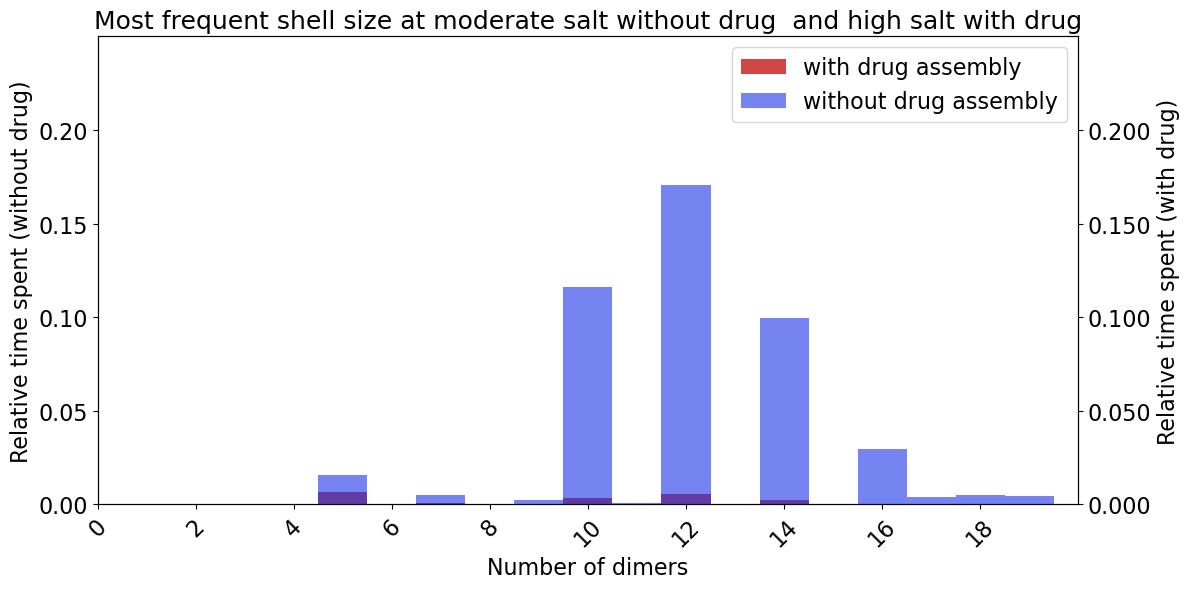

In [37]:

color = (0.8, # redness
         0.2, # greenness
         0.2, # blueness
         0.9 # transparency
         ) 
color2=(0.1, # redness
         0.2, # greenness
         0.9, # blueness
         0.9 # transparency
         )         
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
ax.bar(new_number_of_dimers[1:], new_frequency[1:]/(total_time-new_frequency[0]), color=color, width=1,label='with drug assembly')
wodrug_freq_list = new_frequency_wodrug[1:] / (total_timewodrug - new_frequency_wodrug[0])
ax.bar(new_number_of_dimers_wodrug[1:], [val for val in wodrug_freq_list], color=color2, width=1,label='without drug assembly',alpha=0.6)
ax.set_xlim(0, 20)
ax.set_ylim(0, 0.25)
ax.set_title("Most frequent shell size at moderate salt without drug  and high salt with drug", fontsize=18)
ax.set_xlabel("Number of dimers", fontsize=16)
ax.set_xticks(np.arange(0, 20, step=2))
ax.set_yticks(np.arange(0, 0.25, step=0.05))
ax.tick_params(axis='x', labelrotation=45, labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("Relative time spent (without drug)", fontsize=16)
plt.legend(fontsize=16, loc='upper right')
# Add right-side y-axis
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())  # Match y-limits
ax2.set_yticks(ax.get_yticks()) 
yticks_right= ax.get_yticks()  # multiply by 4 to get actual values
ax2.set_yticklabels([f"{val:.3f}" for val in yticks_right])
ax2.set_ylabel("Relative time spent (with drug)", fontsize=16)
ax2.tick_params(axis='y', labelsize=16)


plt.savefig('assembly_frequency_high_truncate20.png', dpi=300)

In [16]:
combined_df=pd.DataFrame()
for files in energyfiles[0:90]:
    df=pd.read_csv(files, sep=',')
    #df = df.drop(df[df['NE'] <= 3].index)
    #print(df.head)
    #if(df['NE'].iloc[-1]==120):
    combined_df=pd.concat([combined_df,df])






: 

In [14]:
print(combined_df['NE'].unique())

[  3   5   7   9  11  12  10  14  16  15  18  20  21  23  19  17  25  24
  22  26  28  30  32  33  35  36  34  37  38  40  41  45  46  48  49  51
  54  56  57  59  55  60  62  64  63  65  67  68  66  70  72  74  76  77
  75  78  80  81  83  84  86  87  88  90  93  95  97  99 100 101 103 104
 105 107 109 110 112 113 114 115 117 118 120  29  31  39  42  44  47  50
  53  61  69  71  73  79  82  85  89  91  92  94  96  98 102 108 111 119
 121  13  27  43  52 106  58 116 123 124 126 122 128]


Index(['sweep', 'seed', 'seconds', 'epsilon', 'kappa', 'kappaPhi', 'theta0',
       'theta1', 'gb0', 'mu', 'dmu', 'dg', 'theta2', 'energy',
       'binding_energy', 'Nv5', 'Nv6', 'NAB', 'NAB_in', 'NCD_Hex', 'NCD_other',
       'NVin', 'Nhein', 'NCD_T4_in', ' NCD_T3_in', 'NCD_T4', 'NCD_T3', 'Nv',
       'NE', 'Nsurf', 'Nboundary'],
      dtype='object')
[1 0]
[7]
[10]
[5 7]


Text(0.5, 1.0, 'Total elastic energy')

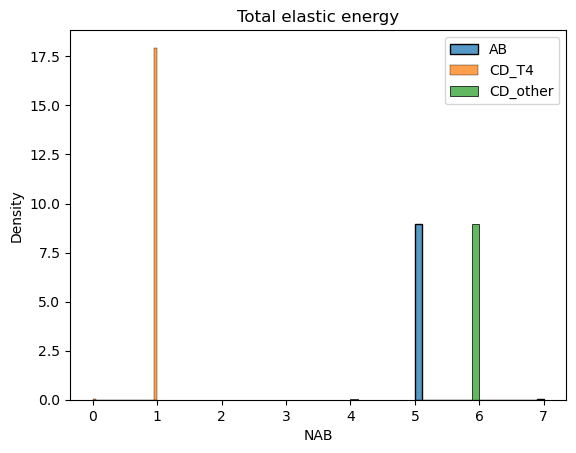

In [15]:
# Sizes: 10,12,14,16,22,24,26,33,44i
import seaborn as sns
df_filter=combined_df[combined_df['NE']==5]
df_filter2=combined_df[combined_df['NE']==12]
df_filter3=combined_df[combined_df['NE']==10]
print(df_filter.columns)
#df_filter=df_filter[df_filter['NAB']==5]
#print(df_filter.head())
#print(df_filter['Nsurf'].unique())
#print(df_filter['Nv6'].unique())
#print(dfs[0]['NVin'])
print(df_filter2['NCD_T4'].unique())
print(df_filter2['Nv'].unique())
print(df_filter2['Nhein'].unique())
print(df_filter2['NAB'].unique())
#print(df_filter['energy'].round(0).value_counts())
sns.histplot(df_filter2,x='NAB',stat='density',label='AB')
sns.histplot(df_filter2,x='NCD_T4',stat='density',label='CD_T4')
sns.histplot(df_filter2,x='NCD_other',stat='density',label='CD_other')
plt.legend()
plt.title('Total elastic energy')


/tmp/ipykernel_147196/1773276683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['NCDout']=df_filter['NCD_T4']-df_filter['NCD_T4_in']


            sweep    seed  seconds  epsilon   kappa  kappaPhi  theta0  theta1  \
NCD_T4_in                                                                       
0          128843  128843   128843   128843  128843    128843  128843  128843   

              gb0      mu  ...    NVin   Nhein   NCD_T3_in  NCD_T4  NCD_T3  \
NCD_T4_in                  ...                                               
0          128843  128843  ...  128843  128843      128843  128843  128843   

               Nv      NE   Nsurf  Nboundary  NCDout  
NCD_T4_in                                             
0          128843  128843  128843     128843  128843  

[1 rows x 31 columns]


/home/smriti/miniconda3/envs/mdaenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_147196/1773276683.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


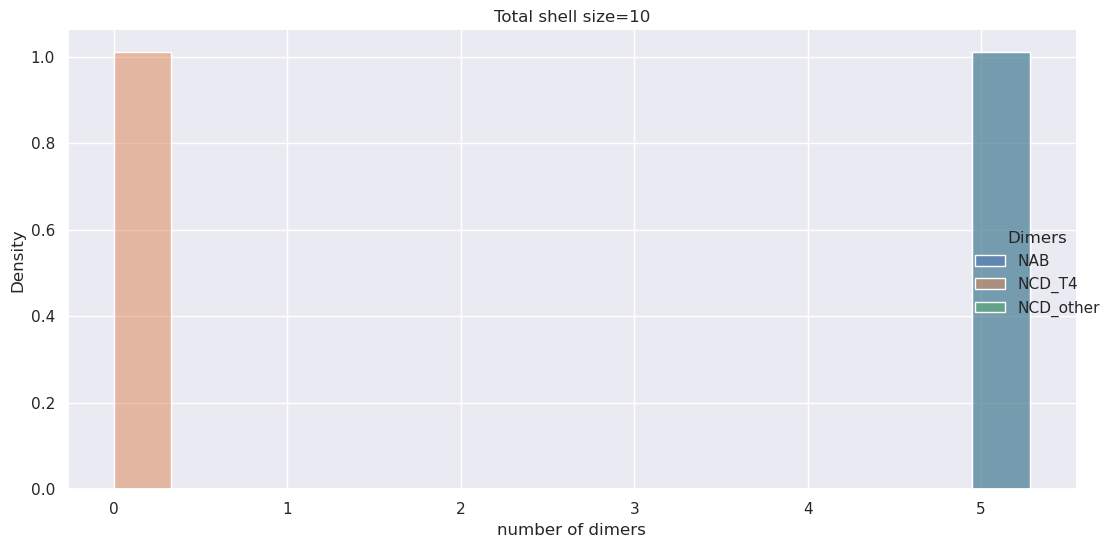

: 

In [25]:
import seaborn as sns
sns.set_theme()
df_filter=df_total[df_total['NE']==10]
df_filter['NCDout']=df_filter['NCD_T4']-df_filter['NCD_T4_in']
print(df_filter.groupby('NCD_T4_in').count())
selected_columns = ['NAB', 'NCD_T4','NCD_other'] 
data_melted = df_filter[selected_columns].melt(var_name="Dimers", value_name="number of dimers")

sns.displot(data_melted,x="number of dimers",hue="Dimers",alpha=0.5,stat="density",binwidth=0.33,height=6,aspect=10/6)
plt.rcParams.update({'font.size': 24})
plt.title("Total shell size=10")
plt.rc('figure', titlesize=30)
plt.tight_layout()
plt.savefig('e_10.png')



In [74]:
data_edges = {'Edge Type': ['AB', 'CD_other','NCD_T4','NCD_T3'], 'col2': [nABs,NCD_other, NCD4,NCD3]}
df = pd.DataFrame(data=data_edges)
print(df.head())

  Edge Type                                               col2
0        AB  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
1  CD_other  [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...
2    NCD_T4  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
3    NCD_T3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


(-5.0, 10.0)

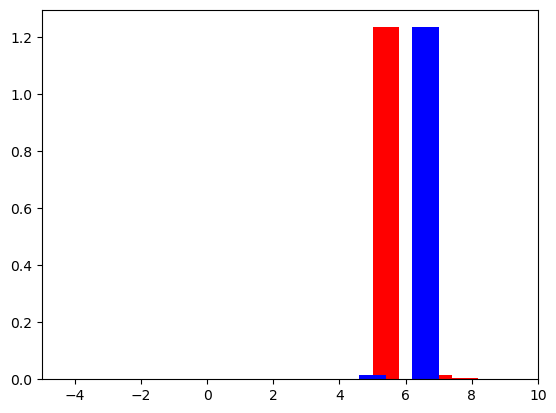

In [73]:

plt.hist(nABs,color='red',density=True,bins=5)
plt.hist(NCD_other,color='blue',density=True,bins=5)
plt.xlim(-5,10)

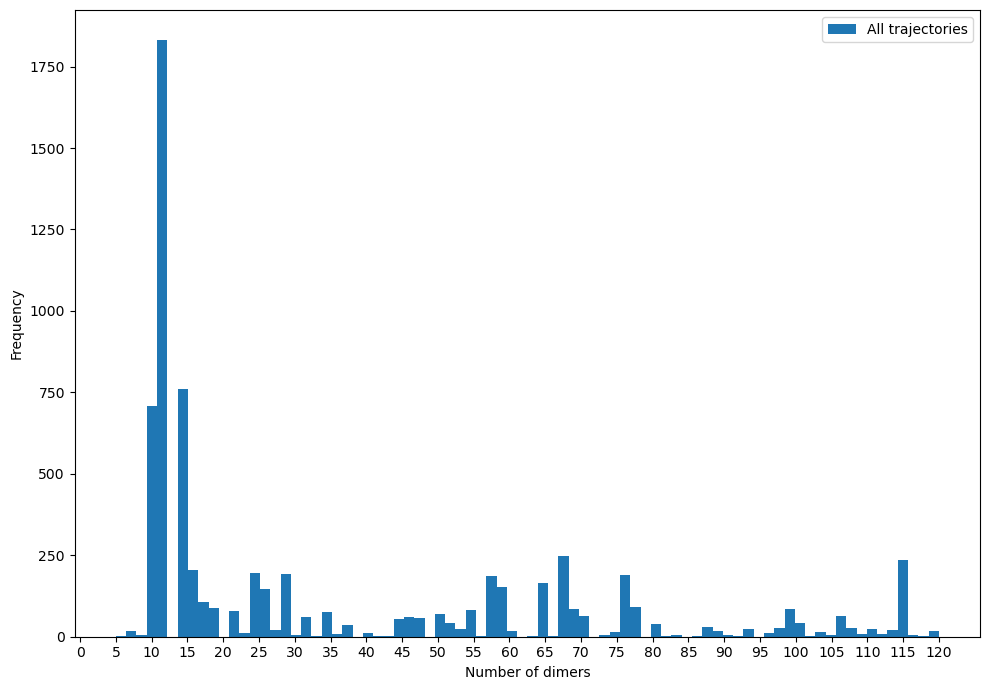

In [44]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7),
                        tight_layout = True)
for files in energyfiles:
    df=pd.read_csv(files, sep=',')
    df = df.drop(df[df['NE'] <= 3].index)
    #if(df['NE'].iloc[-1]==120):
    combined_df=pd.concat([df])

plt.hist(combined_df['NE'],bins=80,label='All trajectories')

plt.xlabel('Number of dimers')
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 125, step=5))
plt.ylabel('Frequency')
plt.legend()
plt.savefig("Total.png")


In [43]:
# Sample lists of tuples
list1 = [("A", 10), ("B", 20), ("A", 30), ("C", 40), ("B", 50)]
list2 = [("A", 5), ("B", 15), ("C", 25), ("D", 35), ("A", 45)]

# Create dictionaries to store the accumulated values for each list
dict1 = {}
dict2 = {}

# Populate the dictionaries by adding the second elements when the first element is common
for item in list1:
    key = item[0]
    value = item[1]
    if key in dict1:
        dict1[key] += value
    else:
        dict1[key] = value

for item in list2:
    key = item[0]
    value = item[1]
    if key in dict2:
        dict2[key] += value
    else:
        dict2[key] = value

# Combine the dictionaries into a single dictionary
combined_dict = {}
for key, value in dict1.items():
    combined_dict[key] = value
for key, value in dict2.items():
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Convert the combined dictionary back to a list of tuples
result_list = [(key, value) for key, value in combined_dict.items()]

print(result_list)


[('A', 90), ('B', 85), ('C', 65), ('D', 35)]


In [63]:
list1 = [("A", 10), ("B", 20), ("A", 30), ("C", 40), ("B", 50)]
list2 = [("A", 5), ("B", 15), ("C", 25), ("D", 35), ("A", 45)]
 # An empty list

# Create a dictionary to store the accumulated values
combined_dict = {}

# Populate the dictionary from list1
for item in list1:
    key = item[0]
    value = item[1]
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Populate the dictionary from list2
for item in list2:
    key = item[0]
    value = item[1]
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Convert the combined dictionary back to a list of tuples
result_list = [(key, value) for key, value in combined_dict.items()]

print(result_list)

[('A', 90), ('B', 85), ('C', 65), ('D', 35)]
